In [847]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from matplotlib.colors import ListedColormap #confusion matrix for problems 2 and 4

Problem 1

In [848]:
df = pd.read_csv("diabetes.csv")

outcome = df.iloc[:,8] 
df = df.iloc[:,:-1]
display(df)
print(outcome)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [849]:
X_train, X_test, y_train, y_test = train_test_split(df, outcome, test_size = 0.2, random_state = 42)

In [850]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [851]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [852]:
y_pred = classifier.predict(X_test)

In [853]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


Text(0.5, 15.0, 'Actual label')

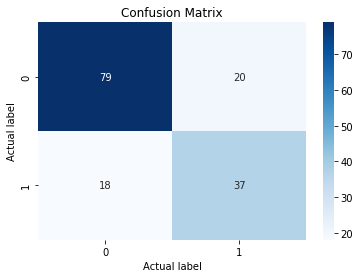

In [854]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Actual label')

Problem 2

In [855]:
C = [5, 10]

for c in C:
  classifier = LogisticRegression(C=c, solver = 'liblinear')
  print(df)
  print(X_train,y_train)
  classifier.fit(df, outcome)
  print('C:',c)
  print('Training accuracy:', classifier.score(X_train,y_train))
  print('Test accuracy:', classifier.score(X_test, y_test))
  print('')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [856]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, df, outcome, cv = kfold)
print(results.std())
print(f"Accuracy: {(results.mean()*100.0, results.std()*100.0)}")

0.0318501370810204
Accuracy: (76.55547067311772, 3.1850137081020398)


In [857]:
#confusion matrix
test_size = 0.33
seed = 0
X_train,X_test,Y_train, Y_test = train_test_split(df, outcome, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[156  14]
 [ 39  45]]


In [858]:
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test  = train_test_split(df,outcome,test_size = test_size,random_state = seed)

model = LogisticRegression(solver='liblinear')

model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


              precision    recall  f1-score   support

           0       0.80      0.92      0.85       170
           1       0.76      0.54      0.63        84

    accuracy                           0.79       254
   macro avg       0.78      0.73      0.74       254
weighted avg       0.79      0.79      0.78       254



Text(0.5, 15.0, 'Actual label')

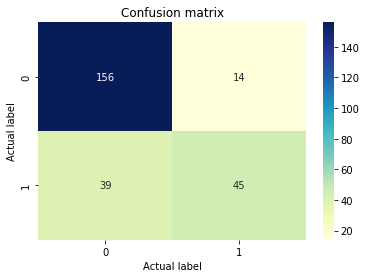

In [859]:
sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Actual label')

Problem 3a

In [860]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [861]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [862]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [863]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [864]:
y_pred = classifier.predict(X_test)

In [865]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


Text(0.5, 15.0, 'Actual label')

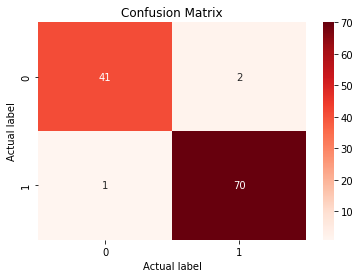

In [866]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Actual label')

Problem 3b

In [867]:
logreg = LogisticRegression(penalty='l1',solver = 'liblinear', random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [868]:
y_pred = logreg.predict(X_test)

In [869]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493


Text(0.5, 15.0, 'Actual label')

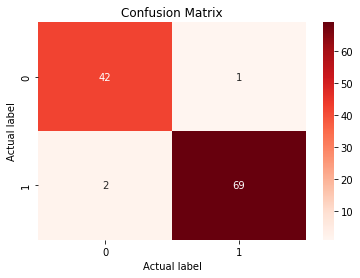

In [870]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Actual label')

Problem 4a

In [871]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [872]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [873]:
C = [5, 10]

for c in C:
  classifier = LogisticRegression(C=c, solver = 'liblinear')
  classifier.fit(X_train, y_train)
  print('C:',c)
  print('Training accuracy:', classifier.score(X_train,y_train))
  print('Test accuracy:', classifier.score(X_test, y_test))
  print('')

C: 5
Training accuracy: 0.967032967032967
Test accuracy: 0.956140350877193

C: 10
Training accuracy: 0.9692307692307692
Test accuracy: 0.956140350877193



In [874]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print(results.std())
print(f"Accuracy: {(results.mean()*100.0, results.std()*100.0)}")

0.02737172430198312
Accuracy: (95.43393882937433, 2.737172430198312)


In [875]:
#confusion matrix
test_size = 0.33
seed = 0
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[ 66   1]
 [  6 115]]


In [876]:
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size = test_size,random_state = seed)

model = LogisticRegression(solver='liblinear')

model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.99      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188



Problem 4b

In [877]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [878]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [879]:
C = [5, 10]

for c in C:
  classifier = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear')
  classifier.fit(X_train, y_train)
  print('C:',c)
  print('Training accuracy:', classifier.score(X_train,y_train))
  print('Test accuracy:', classifier.score(X_test, y_test))
  print('')

C: 5
Training accuracy: 0.9736263736263736
Test accuracy: 0.9649122807017544

C: 10
Training accuracy: 0.9824175824175824
Test accuracy: 0.9736842105263158



In [880]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print(results.std())
print(f"Accuracy: {(results.mean()*100.0, results.std()*100.0)}")

0.02737172430198312
Accuracy: (95.43393882937433, 2.737172430198312)


In [881]:
#confusion matrix
test_size = 0.33
seed = 0
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[ 66   1]
 [  6 115]]


In [882]:
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size = test_size,random_state = seed)

model = LogisticRegression(solver='liblinear')

model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.99      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188

